In [24]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json
import pickle
#This notebook help with generating the box plots 

In [25]:
plt.rcParams['font.family'] = 'Times New Roman'
colors_pallete = {'BEB':'#bdbddd','GIH':'#a39eca','ITU':'#807db9','PJL':'#6a51a3','STU':'#54288e','CEU':'#7fcdbb',
        'FIN':'#41b6c4','GBR':'#1d92c0','IBS':'#225da7','TSI':'#3d4b9e','CDX':'#c7e9c1','CHB':'#a1d99b',
        'CHS':'#7dc77e','JPT':'#41ab5e','KHV':'#238b44','CLM':'#fc9475','MXL':'#fa6a4a','PEL':'#ef3d2f','PUR':'#cc171d',
        'ACB':'#fff7bd','ASW':'#fee7a4','ESN':'#fec44f','GWD':'#fe992a','LWK':'#eb7016','MSL':'#cd4b02','YRI':'#a1451e'}
popcodes = ['BEB','GIH','ITU','PJL','STU','CEU',
        'FIN','GBR','IBS','TSI','CDX','CHB',
        'CHS','JPT','KHV','CLM','MXL','PEL','PUR',
        'ACB','ASW','ESN','GWD','LWK','MSL','YRI']

In [26]:

info24 = pickle.load(open('./v2/mac1_maf1_v1_info_afeuremoved.pkl','rb'))
df_dict = {}
counts = np.array([item[0] for item in info24]).sum(axis=0)
df_dict = {'ids':info24[0][1],'total_count':counts[:,0],'absent_count':counts[:,1],'absent_percentage':(counts[:,1]/counts[:,0])*100}
info_df = pd.DataFrame.from_dict(df_dict)
info_df.set_index('ids',inplace=True)

info24 = pickle.load(open('./v2/mac1_maf1_aeremoved/mac1_maf1_afk_info_aeremoved.pkl','rb'))
df_dict = {}
counts = np.array([item[0] for item in info24]).sum(axis=0)
df_dict = {'ids':info24[0][1],'total_count_afk':counts[:,0],'absent_count_afk':counts[:,1],'absent_percentage_afk':(counts[:,1]/counts[:,0])*100}
info_df_afk = pd.DataFrame.from_dict(df_dict)
info_df_afk.set_index('ids',inplace=True)


info24 = pickle.load(open('./v2/mac1_maf1_aeremoved/mac1_maf1_eur_info_aeremoved.pkl','rb'))
df_dict = {}
counts = np.array([item[0] for item in info24]).sum(axis=0)
df_dict = {'ids':info24[0][1],'total_count_geur':counts[:,0],'absent_count_geur':counts[:,1],'absent_percentage_geur':(counts[:,1]/counts[:,0])*100}
info_df_eur = pd.DataFrame.from_dict(df_dict)
info_df_eur.set_index('ids',inplace=True)

info12 = pickle.load(open('./v2/mac1_maf1_aeremoved/mac1_maf1_12_info_aeremoved.pkl','rb'))
df_dict = {}
counts = np.array([item[0] for item in info12]).sum(axis=0)
df_dict = {'ids':info12[0][1],'total_count_g12':counts[:,0],'absent_count_g12':counts[:,1],'absent_percentage_g12':(counts[:,1]/counts[:,0])*100}
info_df_g12 = pd.DataFrame.from_dict(df_dict)
info_df_g12.set_index('ids',inplace=True)

info24 = pickle.load(open('./v2/mac1_maf1_aeremoved/mac1_maf1_24_info_aeremoved.pkl','rb'))
df_dict = {}
counts = np.array([item[0] for item in info24]).sum(axis=0)
df_dict = {'ids':info24[0][1],'total_count_g24':counts[:,0],'absent_count_g24':counts[:,1],'absent_percentage_g24':(counts[:,1]/counts[:,0])*100}
info_df_g24 = pd.DataFrame.from_dict(df_dict)
info_df_g24.set_index('ids',inplace=True)




info32 = pickle.load(open('./gv2_all/gall32/info_list31.pkl','rb'))
df_dict = {}
counts = np.array([item[0] for item in info32]).sum(axis=0)
df_dict = {'ids':info32[0][1],'total_count_gv2_all':counts[:,0],'absent_count_gv2_all':counts[:,1],'absent_percentage_gv2_all':(counts[:,1]/counts[:,0])*100}
info_df_gv2all = pd.DataFrame.from_dict(df_dict)
info_df_gv2all.set_index('ids',inplace=True)



In [27]:
subpopdf = pd.read_csv('./subpops.csv',delimiter=',')
subpopdf.dropna(inplace=True)
subpopdf.set_index('sampleid',inplace=True)


In [28]:
mergedf = info_df.join(info_df_g12,how='outer')
mergedf = mergedf.join(info_df_g24,how='outer')
mergedf = mergedf.join(info_df_afk,how='outer')
mergedf = mergedf.join(info_df_eur,how='outer')
mergedf = mergedf.join(info_df_gv2all,how='outer')
mergedf = mergedf.join(subpopdf,how='left')
mergedf['id'] = mergedf.index

In [29]:
mergedf.loc['HG01783','popcode'] = 'IBS'
mergedf['subpopcolor'] = mergedf['popcode']
mergedf = mergedf.replace({'subpopcolor':colors_pallete})
mergedf.sort_values(by = ['suppopcode','popcode', 'absent_count'], ascending = [True,True, False],inplace=True)

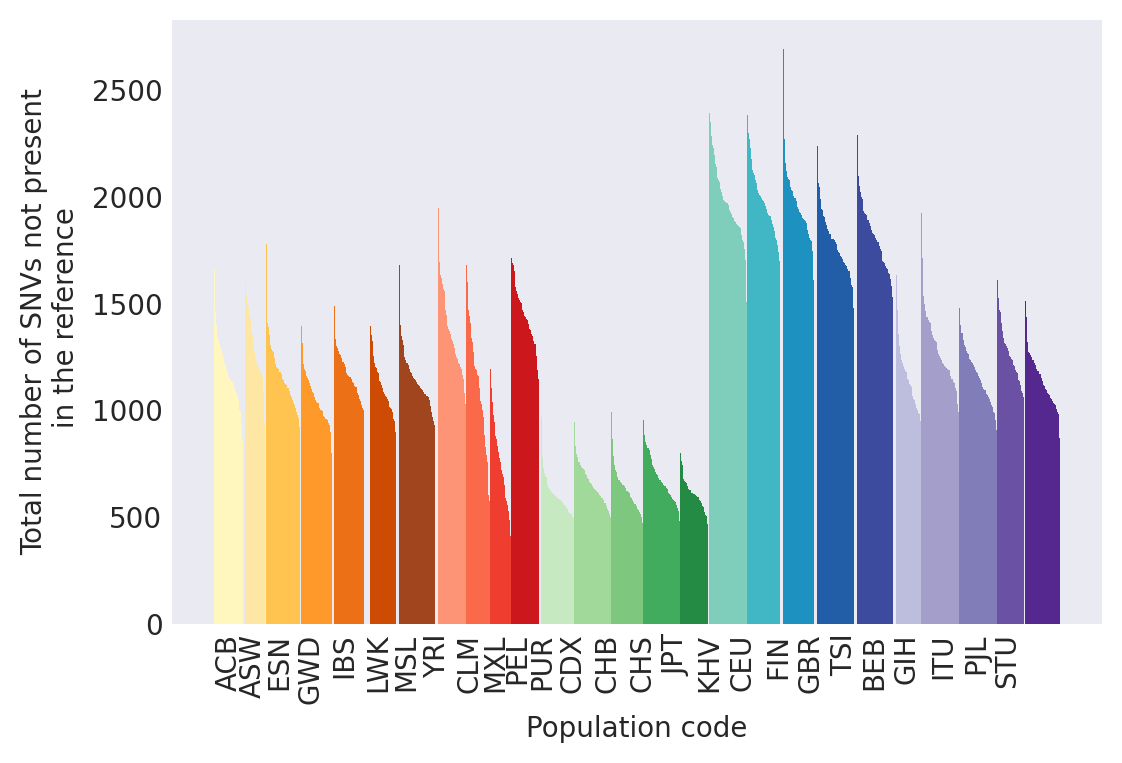

In [30]:
with plt.style.context('seaborn-dark'):
    fig,ax = plt.subplots(figsize=(6,4),dpi=200)
    plt.rcParams["font.family"] = "Serif"
    xcount = mergedf.shape[0]
    width = 4
    base = 0
    ticklist = []
    ticklabellist = []
    popcounts = mergedf.groupby('popcode',sort=False).count()
    
    for popcode in popcounts.index:
        popcount = popcounts.loc[popcode]['total_count']
        ticklist.append(base+(width*popcount/2))
        base += (popcount*width)
        ticklabellist.append(popcode)
    xvals = np.arange(0,width*xcount,width)
    xvals = xvals+(width/2)
    ax.bar(x=xvals,height=mergedf['absent_count'],width=width,color=mergedf['subpopcolor'])
    ax.set_xticks(ticklist)
    ax.set_xticklabels(ticklabellist,rotation=90)
    ax.set_ylabel('Total number of SNVs not present\n in the reference')
    ax.set_xlabel('Population code')
    


In [23]:
with open('./afk/all_bg.txt','wt') as output_file:
    for item in mergedf[mergedf['suppopcode']=='AFR'].sort_values(by='absent_count').tail(32).index.values:
        print(item,file=output_file)

## Boxplots for Recovery

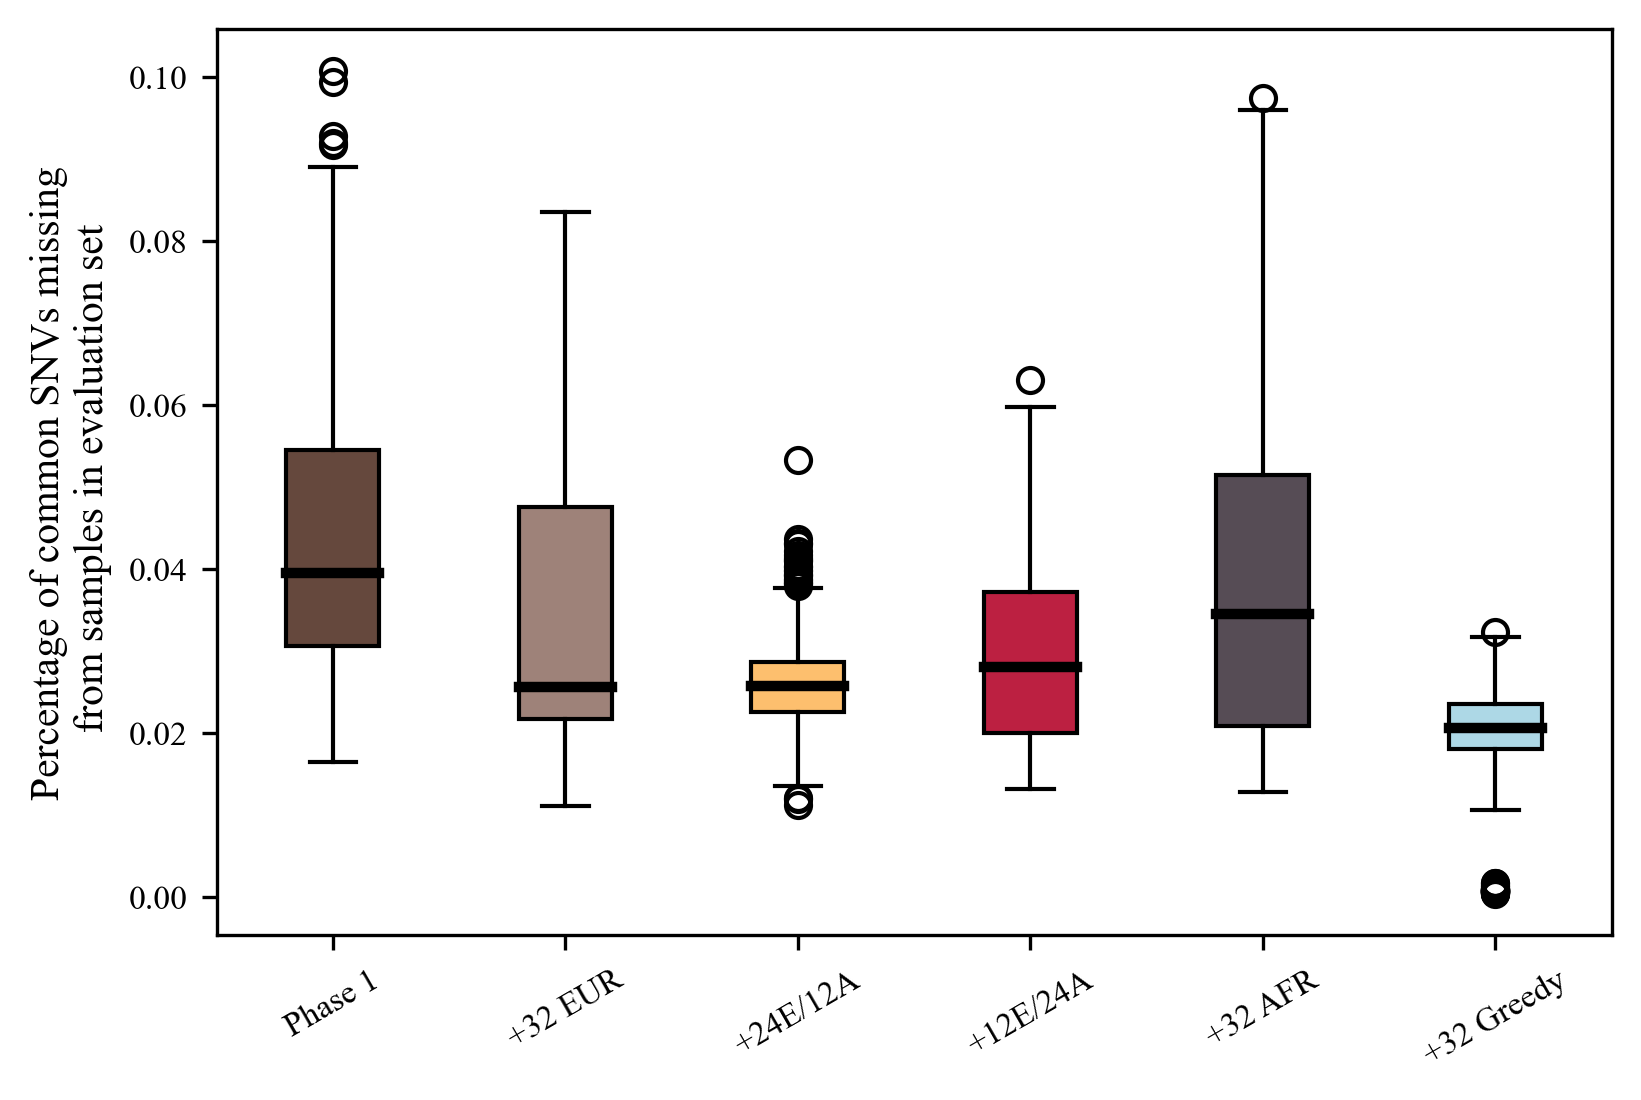

In [33]:

fig,ax= plt.subplots(figsize=(6,4),dpi=300)

exp_dict = {'Phase 1':'','12 EUR':'_12','24 EUR':'_24','ALL EUR':'_geur','Greedy 12':'_g12','Greedy 24':'_g24','32 AFR':'_afk','Greedy2 24':'_gv2','Greedy2 12':'_gv2_12','Greedy2 All':'_gv2_all'}
exp_list = ['Phase 1','ALL EUR','Greedy 12','Greedy 24','32 AFR','Greedy2 All']
labels = ['Phase 1','+32 EUR','+24E/12A','+12E/24A','+32 AFR','+32 Greedy']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')
temp_data = []

colors=['#02315E',
'#00457E',
'#2F70AF',
'#B9848C',
'#806491']


colors=['#2C5D37',
'#E3C515',
'#EE51B1',
'#A59CD3',
'#4B2D9F']
colors=['#65483D',
'#9E8279',
'#FDBF6E',
'#BC2041',
'#564C55',
'lightblue']
for index,key in enumerate(exp_list):

        
    temp_val = mergedf['absent_percentage'+exp_dict[key] ].values
    temp_val = temp_val[~np.isnan(temp_val)]
    temp_data.append(temp_val)
bplist = ax.boxplot(temp_data,labels=labels,widths=0.4,patch_artist=True,medianprops=medianprops)
for index,key in enumerate(exp_list):
    bplist['boxes'][index].set_facecolor(colors[index])
#ax.set_title("test")
ax.set_ylabel('Percentage of common SNVs missing\n from samples in evaluation set')
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=6)
ax.tick_params(axis='x', labelrotation=30)
# fig.delaxes(ax_list[-4])
# fig.delaxes(ax_list[-3])
# fig.delaxes(ax_list[-2])
# fig.delaxes(ax_list[-1])
#fig.text(0.5, 0.08, 'Choice of reference population', ha='center')
#fig.text(0.09, 0.5, 'Number of SNVs not present in the reference', va='center', rotation='vertical')